Düşman Grupları (Tehdit Seviyeleri):
Düşman 1: Tehdit Seviyesi 0
Düşman 2: Tehdit Seviyesi 2
Düşman 3: Tehdit Seviyesi 1
Düşman 4: Tehdit Seviyesi 0
Düşman 5: Tehdit Seviyesi 1
Düşman 6: Tehdit Seviyesi 2
Düşman 7: Tehdit Seviyesi 1
Düşman 8: Tehdit Seviyesi 0
Düşman 9: Tehdit Seviyesi 2
Düşman 10: Tehdit Seviyesi 2
Düşman 11: Tehdit Seviyesi 2
Düşman 12: Tehdit Seviyesi 2
Düşman 13: Tehdit Seviyesi 0
Düşman 14: Tehdit Seviyesi 0
Düşman 15: Tehdit Seviyesi 1
Düşman 16: Tehdit Seviyesi 0
Düşman 17: Tehdit Seviyesi 2
Düşman 18: Tehdit Seviyesi 1
Düşman 19: Tehdit Seviyesi 2
Düşman 20: Tehdit Seviyesi 1

Küme Merkezleri:
Küme 1 Merkezi: Mesafe: 66.67, Hız: 2.00, Sağlık: 22.50
Küme 2 Merkezi: Mesafe: 17.50, Hız: 6.50, Sağlık: 71.67
Küme 3 Merkezi: Mesafe: 40.00, Hız: 3.62, Sağlık: 43.12


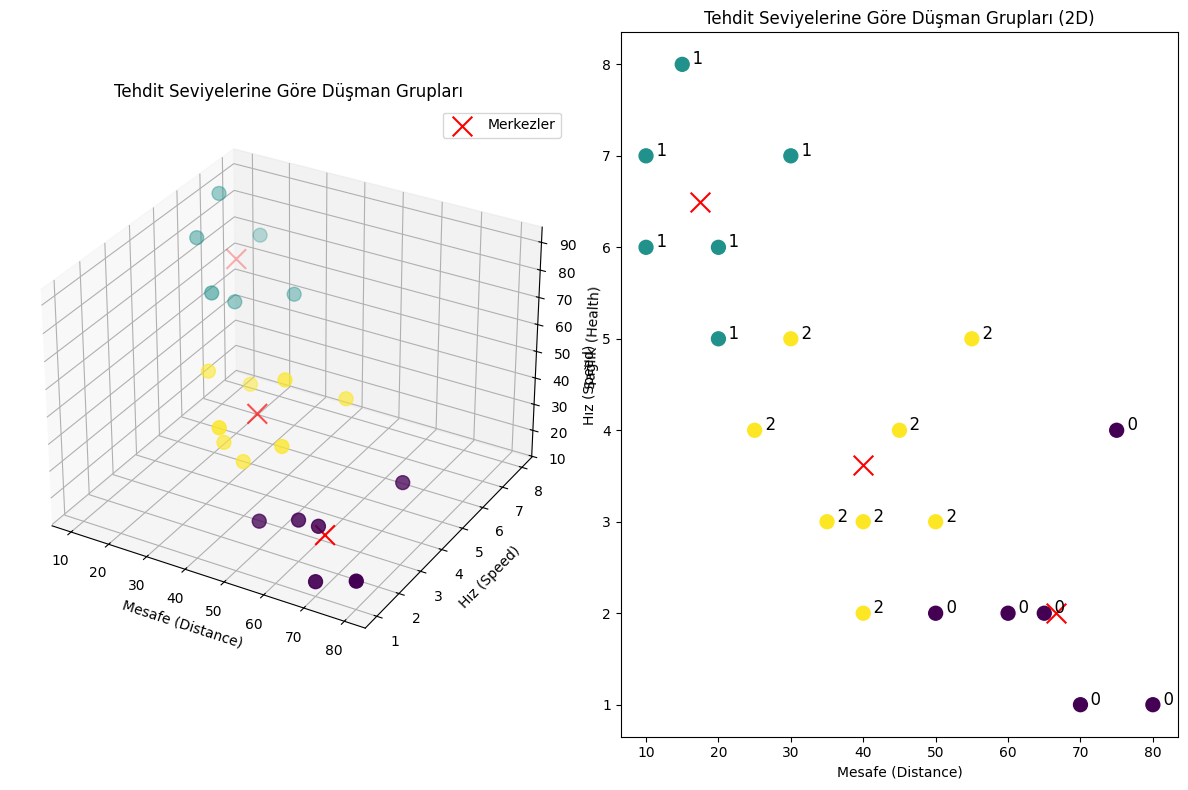

In [21]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Düşmanların özelliklerini içeren veri seti: [Mesafe, Hız, Sağlık]
data = np.array([
    [50, 2, 20],
    [30, 5, 40],
    [10, 7, 90],
    [70, 1, 15],
    [20, 6, 60],
    [40, 3, 30],
    [15, 8, 70],
    [60, 2, 25],
    [25, 4, 50],
    [35, 3, 35],
    [55, 5, 45],
    [45, 4, 55],
    [65, 2, 25],
    [80, 1, 20],
    [10, 6, 80],
    [75, 4, 30],
    [50, 3, 40],
    [30, 7, 60],
    [40, 2, 50],
    [20, 5, 70]
])

# K-means modelini oluşturma
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Etiketler
labels = kmeans.labels_

# Küme merkezleri
centroids = kmeans.cluster_centers_

# Sonuçları yazdırma
print("Düşman Grupları (Tehdit Seviyeleri):")
for i, label in enumerate(labels):
    print(f"Düşman {i + 1}: Tehdit Seviyesi {label}")

# Küme merkezlerine ait açıklamalar
print("\nKüme Merkezleri:")
for i, center in enumerate(centroids):
    print(f"Küme {i + 1} Merkezi: Mesafe: {center[0]:.2f}, Hız: {center[1]:.2f}, Sağlık: {center[2]:.2f}")

    
# Görselleştirme
fig = plt.figure(figsize=(12, 8))

# 3D scatter plot
ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', s=100, marker='o')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=200, label='Merkezler')
ax.set_xlabel('Mesafe (Distance)')
ax.set_ylabel('Hız (Speed)')
ax.set_zlabel('Sağlık (Health)')
ax.set_title("Tehdit Seviyelerine Göre Düşman Grupları")
ax.legend()

# 2D scatter plot (Mesafe ve Hız)
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=100)
ax2.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Merkezler')
ax2.set_xlabel('Mesafe (Distance)')
ax2.set_ylabel('Hız (Speed)')
ax2.set_title("Tehdit Seviyelerine Göre Düşman Grupları (2D)")

# Küme etiketlerini yazma
for i, label in enumerate(labels):
    ax2.text(data[i, 0], data[i, 1], f'  {label}', color='black', fontsize=12)

plt.tight_layout()
plt.show()
